In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta

sp = yf.Ticker("^GSPC")

info = sp.info

info.keys()

dict_keys(['maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'fiftyDayAverage', 'twoHundredDayAverage', 'currency', 'exchange', 'quoteType', 'symbol', 'underlyingSymbol', 'shortName', 'longName', 'firstTradeDateEpochUtc', 'timeZoneFullName', 'timeZoneShortName', 'uuid', 'messageBoardId', 'gmtOffSetMilliseconds', 'trailingPegRatio'])

In [40]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta

# Fetch the data
data = yf.download(tickers = '^GSPC', start = '2010-01-01', end = '2022-01-01')

# Calculate SMA and RSI as features
data['SMA_50'] = ta.sma(data['Close'], length=50) # small moving average (50 days)
data['RSI_14'] = ta.rsi(data['Close'], length=14) # relative strength index
#data['BBANDS_50'] = ta.bbands(data['Close'], length=50)

# Create labels: 1 if next day's close is higher than today's close, else 0
data['Next_Close'] = data['Close'].shift(-1) # Next day's close
data['Target'] = (data['Next_Close'] > data['Close']).astype(int)

# Drop rows with NaN values because of the SMA and RSI calculations
data_clean = data.dropna()
data_clean.info()


[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2971 entries, 2010-03-16 to 2021-12-30
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2971 non-null   float64
 1   High        2971 non-null   float64
 2   Low         2971 non-null   float64
 3   Close       2971 non-null   float64
 4   Adj Close   2971 non-null   float64
 5   Volume      2971 non-null   int64  
 6   SMA_50      2971 non-null   float64
 7   RSI_14      2971 non-null   float64
 8   Next_Close  2971 non-null   float64
 9   Target      2971 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 243.7 KB


In [41]:


# Calculate Bollinger Bands
data.ta.bbands(append=True)

# Print the DataFrame with Bollinger Bands
print(data)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  1116.560059  1133.869995  1116.560059  1132.989990  1132.989990   
2010-01-05  1132.660034  1136.630005  1129.660034  1136.520020  1136.520020   
2010-01-06  1135.709961  1139.189941  1133.949951  1137.140015  1137.140015   
2010-01-07  1136.270020  1142.459961  1131.319946  1141.689941  1141.689941   
2010-01-08  1140.520020  1145.390015  1136.219971  1144.979980  1144.979980   
...                 ...          ...          ...          ...          ...   
2021-12-27  4733.990234  4791.490234  4733.990234  4791.189941  4791.189941   
2021-12-28  4795.490234  4807.020020  4780.040039  4786.350098  4786.350098   
2021-12-29  4788.640137  4804.060059  4778.080078  4793.060059  4793.060059   
2021-12-30  4794.229980  4808.930176  4775.330078  4778.729980  4778.729980   
2021-12-31  4775.209961  4786.830078  4765.750000  4

In [42]:
data_clean = data.dropna()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2971 entries, 2010-03-16 to 2021-12-30
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2971 non-null   float64
 1   High        2971 non-null   float64
 2   Low         2971 non-null   float64
 3   Close       2971 non-null   float64
 4   Adj Close   2971 non-null   float64
 5   Volume      2971 non-null   int64  
 6   SMA_50      2971 non-null   float64
 7   RSI_14      2971 non-null   float64
 8   Next_Close  2971 non-null   float64
 9   Target      2971 non-null   int32  
 10  BBL_5_2.0   2971 non-null   float64
 11  BBM_5_2.0   2971 non-null   float64
 12  BBU_5_2.0   2971 non-null   float64
 13  BBB_5_2.0   2971 non-null   float64
 14  BBP_5_2.0   2971 non-null   float64
dtypes: float64(13), int32(1), int64(1)
memory usage: 359.8 KB


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Splitting the dataset
X = data_clean[['Close', 
                'SMA_50', 
                'RSI_14',
                'BBL_5_2.0',
                'BBM_5_2.0',
                'BBU_5_2.0',
                'BBB_5_2.0']]
y = data_clean['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)

accuracy


0.5529411764705883

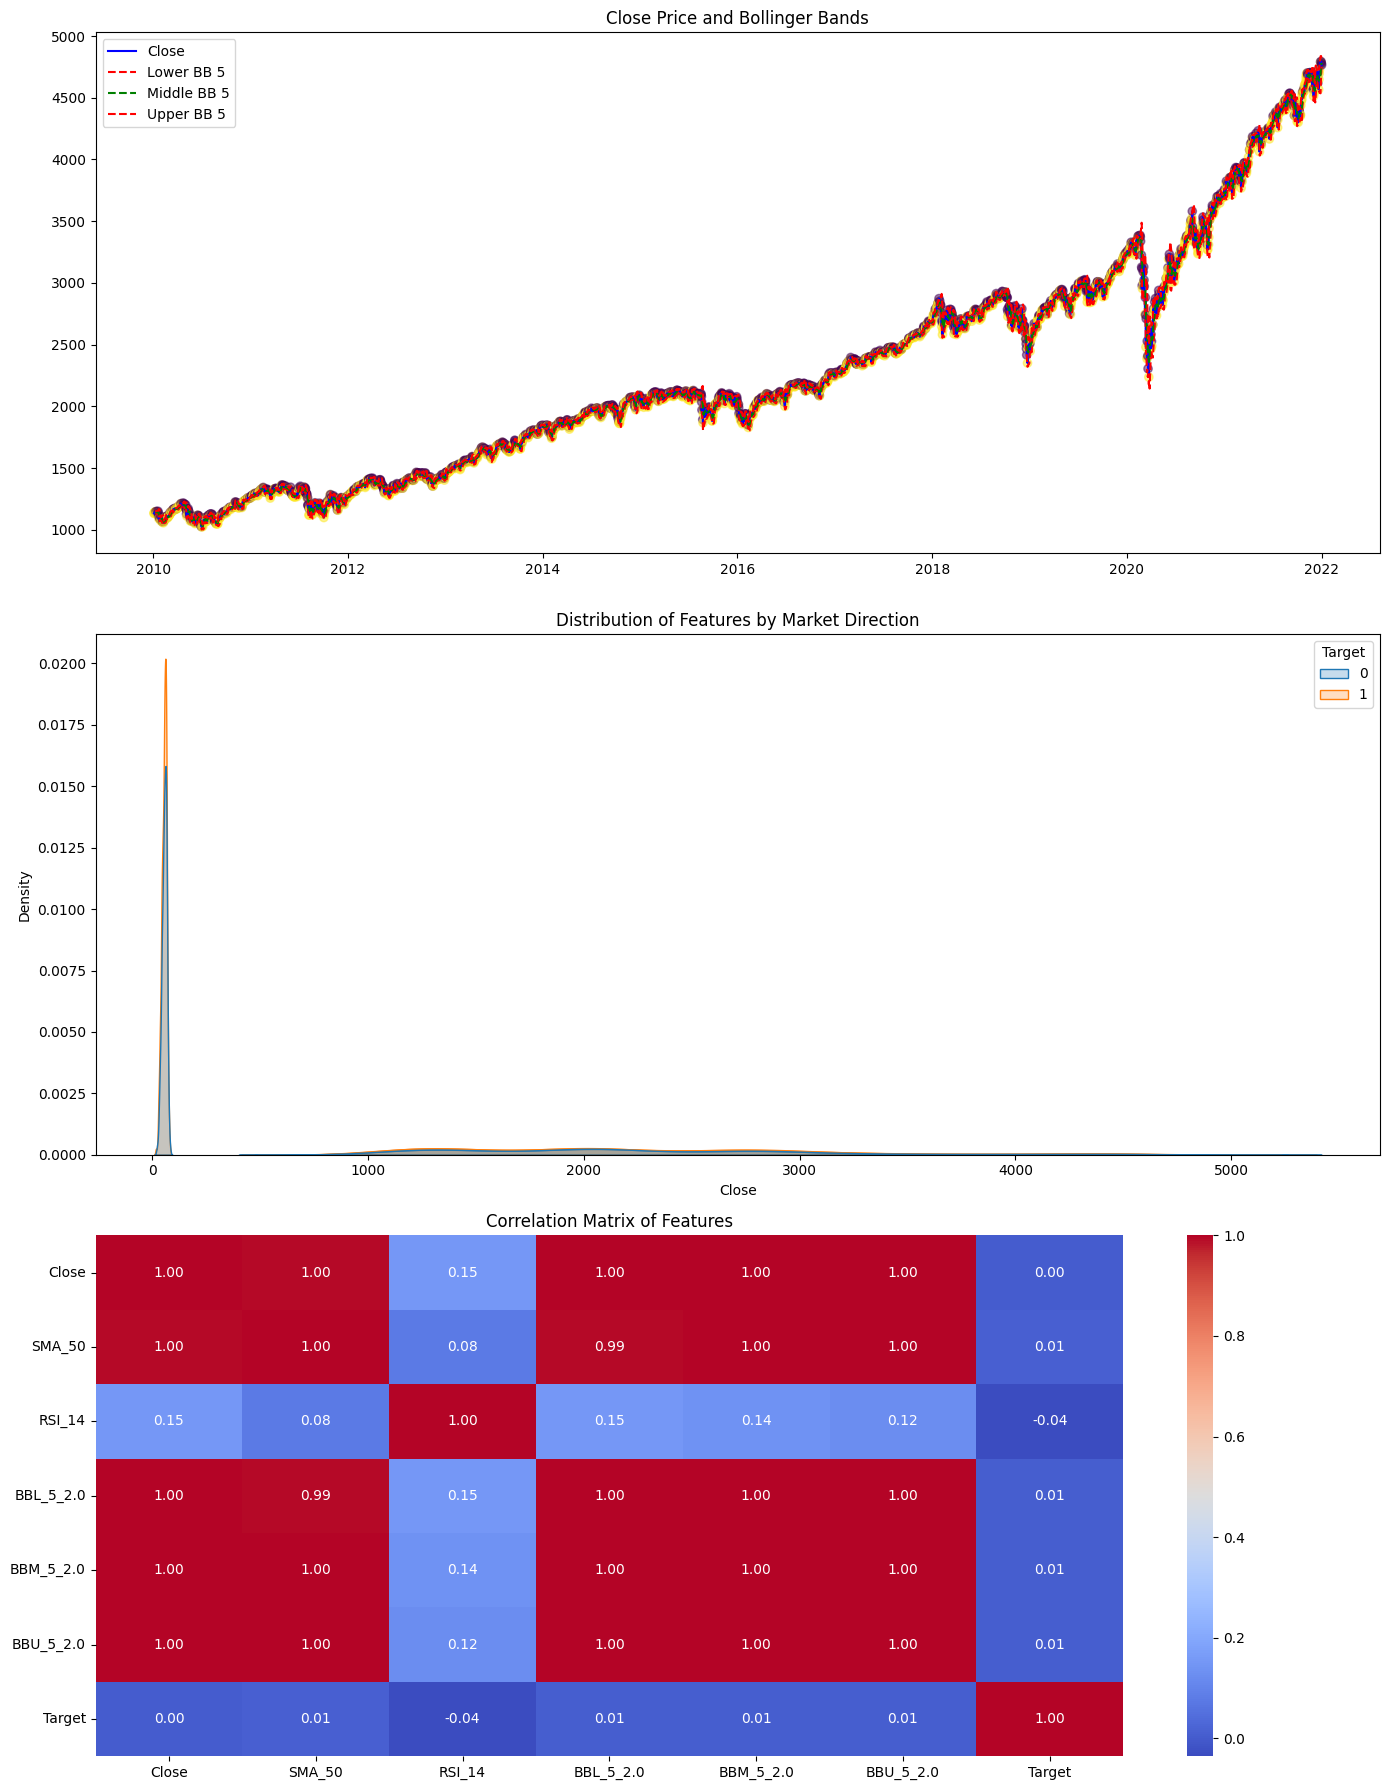

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Plot 1: Closing Price with Bollinger Bands
axs[0].plot(data['Close'], label='Close', color='blue')
axs[0].plot(data['BBL_5_2.0'], label='Lower BB 5', linestyle='--', color='red')
axs[0].plot(data['BBM_5_2.0'], label='Middle BB 5', linestyle='--', color='green')
axs[0].plot(data['BBU_5_2.0'], label='Upper BB 5', linestyle='--', color='red')
axs[0].scatter(data.index, data['Close'], c=data['Target'], cmap='viridis', alpha=0.5)
axs[0].set_title('Close Price and Bollinger Bands')
axs[0].legend()

# Plot 2: Feature distributions by Target
features = ['Close', 'SMA_50', 'RSI_14']
for feature in features:
    sns.kdeplot(data=data, x=feature, hue='Target', ax=axs[1], fill=True)
axs[1].set_title('Distribution of Features by Market Direction')

# Plot 3: Correlation Matrix
sns.heatmap(data[['Close', 'SMA_50', 'RSI_14', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0', 'Target']].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axs[2])
axs[2].set_title('Correlation Matrix of Features')

plt.tight_layout()
plt.show()

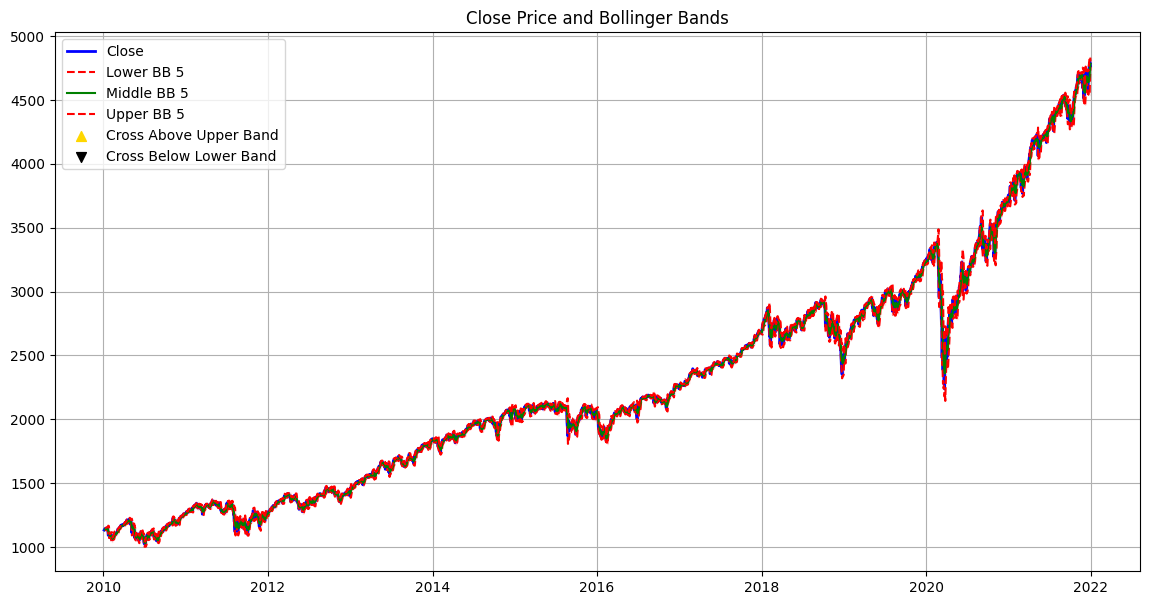

In [50]:

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close', color='blue', linewidth=2)
plt.plot(data['BBL_5_2.0'], label='Lower BB 5', linestyle='--', color='red', linewidth=1.5)
plt.plot(data['BBM_5_2.0'], label='Middle BB 5', linestyle='-', color='green', linewidth=1.5)
plt.plot(data['BBU_5_2.0'], label='Upper BB 5', linestyle='--', color='red', linewidth=1.5)

# Fill between Bollinger Bands
plt.fill_between(data.index, data['BBL_5_2.0'], data['BBU_5_2.0'], color='red', alpha=0.1)

# Highlight crossings
cross_up = (data['Close'] > data['BBU_5_2.0'])
cross_down = (data['Close'] < data['BBL_5_2.0'])
plt.scatter(data[cross_up].index, data[cross_up]['Close'], color='gold', label='Cross Above Upper Band', marker='^', s=50)
plt.scatter(data[cross_down].index, data[cross_down]['Close'], color='black', label='Cross Below Lower Band', marker='v', s=50)

plt.title('Close Price and Bollinger Bands')
plt.legend()
plt.grid(True)
plt.show()

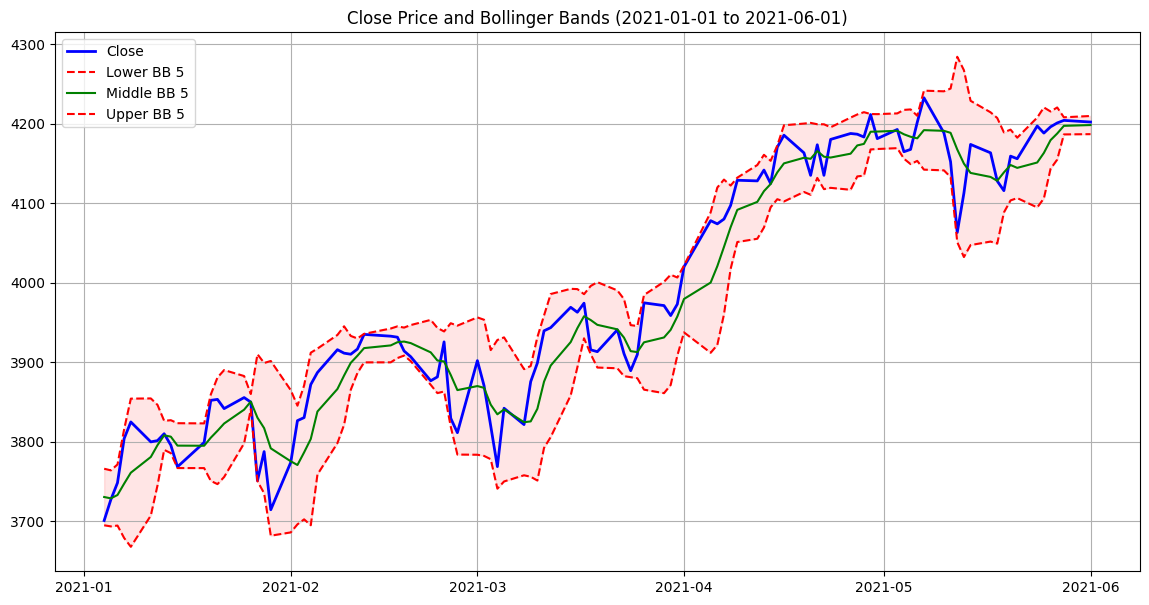

In [52]:
# Specify a period to zoom in on (e.g., a particularly volatile year or month)
start_date = '2021-01-01'
end_date = '2021-06-01'
zoomed_data = data[start_date:end_date]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(zoomed_data['Close'], label='Close', color='blue', linewidth=2)
plt.plot(zoomed_data['BBL_5_2.0'], label='Lower BB 5', linestyle='--', color='red', linewidth=1.5)
plt.plot(zoomed_data['BBM_5_2.0'], label='Middle BB 5', linestyle='-', color='green', linewidth=1.5)
plt.plot(zoomed_data['BBU_5_2.0'], label='Upper BB 5', linestyle='--', color='red', linewidth=1.5)

# Fill between Bollinger Bands
plt.fill_between(zoomed_data.index, zoomed_data['BBL_5_2.0'], zoomed_data['BBU_5_2.0'], color='red', alpha=0.1)

# Highlight crossings
cross_up = (zoomed_data['Close'] > zoomed_data['BBU_5_2.0'])
cross_down = (zoomed_data['Close'] < zoomed_data['BBL_5_2.0'])
#plt.scatter(zoomed_data[cross_up].index, zoomed_data[cross_up]['Close'], color='gold', label='Cross Above Upper Band', marker='^', s=50)
#plt.scatter(zoomed_data[cross_down].index, zoomed_data[cross_down]['Close'], color='black', label='Cross Below Lower Band', marker='v', s=50)

plt.title(f'Close Price and Bollinger Bands ({start_date} to {end_date})')
plt.legend()
plt.grid(True)
plt.show()

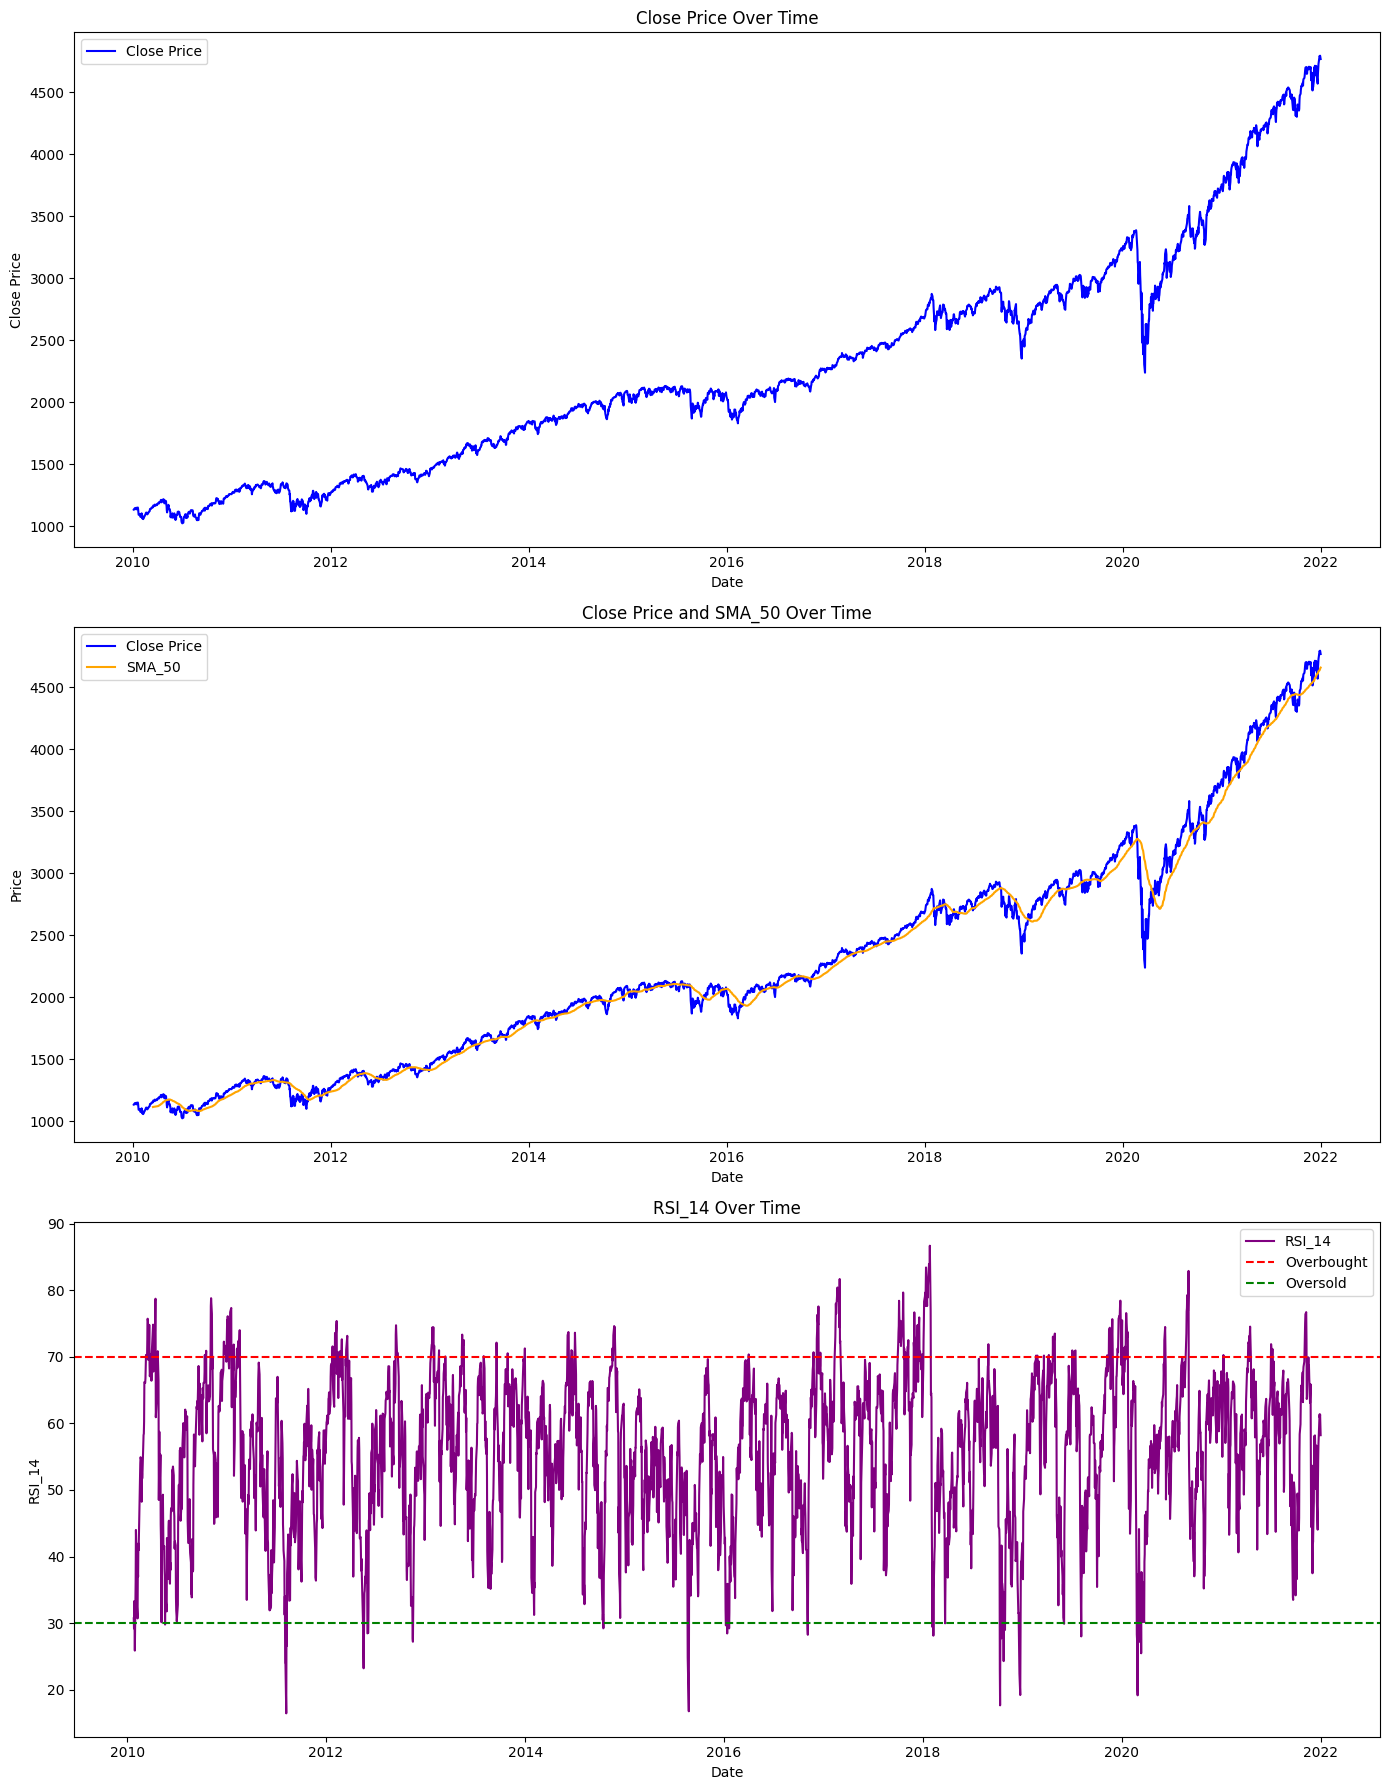

In [45]:
import matplotlib.pyplot as plt

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Closing Price Over Time
axs[0].plot(data.index, data['Close'], label='Close Price', color='blue')
axs[0].set_title('Close Price Over Time')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close Price')
axs[0].legend()

# SMA_50 and Closing Price
axs[1].plot(data.index, data['Close'], label='Close Price', color='blue')
axs[1].plot(data.index, data['SMA_50'], label='SMA_50', color='orange')
axs[1].set_title('Close Price and SMA_50 Over Time')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].legend()

# RSI_14 Over Time
axs[2].plot(data.index, data['RSI_14'], label='RSI_14', color='purple')
axs[2].set_title('RSI_14 Over Time')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('RSI_14')
axs[2].axhline(70, linestyle='--', color='red', label='Overbought')
axs[2].axhline(30, linestyle='--', color='green', label='Oversold')
axs[2].legend()

plt.tight_layout()
plt.show()

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Assuming X and y are already defined
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)


# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM
time_steps = 15
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)
y_seq = to_categorical(y_seq)

# Split data into training and test sets
X_train_seq, X_test_seq = X_seq[:int(len(X_seq)*0.8)], X_seq[int(len(X_seq)*0.8):]
y_train_seq, y_test_seq = y_seq[:int(len(y_seq)*0.8)], y_seq[int(len(y_seq)*0.8):]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X.shape[1]), return_sequences=True),  # First LSTM layer
    Dropout(0.2),
    LSTM(50, activation='relu'),  # Second LSTM layer
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Accuracy: {test_acc}")


C:\Users\smmcd\AppData\Local\Temp\ipykernel_13820\3612377479.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


Epoch 1/10
67/67 [==============================] - 8s 27ms/step - loss: 0.6914 - accuracy: 0.5391 - val_loss: 0.6982 - val_accuracy: 0.5212
Epoch 2/10
67/67 [==============================] - 1s 17ms/step - loss: 0.6897 - accuracy: 0.5447 - val_loss: 0.6943 - val_accuracy: 0.5212
Epoch 3/10
67/67 [==============================] - 1s 19ms/step - loss: 0.6902 - accuracy: 0.5447 - val_loss: 0.6950 - val_accuracy: 0.5212
Epoch 4/10
67/67 [==============================] - 1s 21ms/step - loss: 0.6899 - accuracy: 0.5447 - val_loss: 0.6952 - val_accuracy: 0.5212
Epoch 5/10
67/67 [==============================] - 1s 17ms/step - loss: 0.6897 - accuracy: 0.5447 - val_loss: 0.6941 - val_accuracy: 0.5212
Epoch 6/10
67/67 [==============================] - 1s 17ms/step - loss: 0.6898 - accuracy: 0.5447 - val_loss: 0.6955 - val_accuracy: 0.5212
Epoch 7/10
67/67 [==============================] - 1s 17ms/step - loss: 0.6890 - accuracy: 0.5447 - val_loss: 0.6958 - val_accuracy: 0.5212
Epoch 8/10
67

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Scale features - reusing the scaler from your LSTM example for consistency
X_scaled = scaler.fit_transform(X)  # Assuming X is already defined and appropriate for model input

# Split data into training and test sets
X_train_dense, X_test_dense, y_train_dense, y_test_dense = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

# Build the Dense Model
dense_model = Sequential([
    Dense(64, activation='relu', input_dim=X.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to categorical
y_train_dense_cat = to_categorical(y_train_dense)
y_test_dense_cat = to_categorical(y_test_dense)

# Train model
dense_model.fit(X_train_dense, y_train_dense_cat, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate model
dense_test_loss, dense_test_acc = dense_model.evaluate(X_test_dense, y_test_dense_cat)
print(f"Dense Model Test Accuracy: {dense_test_acc}")


Epoch 1/10
67/67 [==============================] - 3s 12ms/step - loss: 0.6998 - accuracy: 0.5234 - val_loss: 0.6888 - val_accuracy: 0.5462
Epoch 2/10
67/67 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5430 - val_loss: 0.6889 - val_accuracy: 0.5462
Epoch 3/10
67/67 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5379 - val_loss: 0.6881 - val_accuracy: 0.5462
Epoch 4/10
67/67 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5398 - val_loss: 0.6887 - val_accuracy: 0.5462
Epoch 5/10
67/67 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.5566 - val_loss: 0.6883 - val_accuracy: 0.5462
Epoch 6/10
67/67 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5262 - val_loss: 0.6887 - val_accuracy: 0.5462
Epoch 7/10
67/67 [==============================] - 1s 10ms/step - loss: 0.6918 - accuracy: 0.5472 - val_loss: 0.6907 - val_accuracy: 0.5462
Epoch 8/10
67/67 [

In [48]:
from tensorflow.keras.layers import SimpleRNN

# Create sequences for RNN - reusing the create_sequences function from your LSTM example
X_seq_rnn, y_seq_rnn = create_sequences(X_scaled, y, time_steps=10)  # Assuming time_steps as 10
y_seq_rnn = to_categorical(y_seq_rnn)

# Split data into training and test sets for RNN
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_seq_rnn, y_seq_rnn, test_size=0.2, random_state=50)

# Build the RNN Model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True),
    Dropout(0.2),
    SimpleRNN(50, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
rnn_model.fit(X_train_rnn, y_train_rnn, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate model
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(X_test_rnn, y_test_rnn)
print(f"RNN Model Test Accuracy: {rnn_test_acc}")


C:\Users\smmcd\AppData\Local\Temp\ipykernel_13820\2277278200.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


Epoch 1/10
67/67 [==============================] - 6s 20ms/step - loss: 0.7023 - accuracy: 0.5204 - val_loss: 0.6931 - val_accuracy: 0.5232
Epoch 2/10
67/67 [==============================] - 1s 8ms/step - loss: 0.6938 - accuracy: 0.5293 - val_loss: 0.6883 - val_accuracy: 0.5401
Epoch 3/10
67/67 [==============================] - 1s 16ms/step - loss: 0.6921 - accuracy: 0.5260 - val_loss: 0.6898 - val_accuracy: 0.5401
Epoch 4/10
67/67 [==============================] - 1s 18ms/step - loss: 0.6930 - accuracy: 0.5223 - val_loss: 0.6891 - val_accuracy: 0.5401
Epoch 5/10
67/67 [==============================] - 1s 14ms/step - loss: 0.6905 - accuracy: 0.5378 - val_loss: 0.6899 - val_accuracy: 0.5401
Epoch 6/10
67/67 [==============================] - 1s 11ms/step - loss: 0.6930 - accuracy: 0.5326 - val_loss: 0.6903 - val_accuracy: 0.5401
Epoch 7/10
67/67 [==============================] - 2s 25ms/step - loss: 0.6917 - accuracy: 0.5378 - val_loss: 0.6889 - val_accuracy: 0.5401
Epoch 8/10
67/

Lucian wants us to predicting magitude of the price. Care more when its high, less when its low

C:\Users\smmcd\AppData\Local\Temp\ipykernel_13820\2466003427.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


Epoch 1/10
67/67 [==============================] - 4s 24ms/step - loss: 0.6912 - accuracy: 0.5340 - val_loss: 0.6949 - val_accuracy: 0.5232
Epoch 2/10
67/67 [==============================] - 1s 10ms/step - loss: 0.6899 - accuracy: 0.5462 - val_loss: 0.6941 - val_accuracy: 0.5232
Epoch 3/10
67/67 [==============================] - 1s 13ms/step - loss: 0.6895 - accuracy: 0.5458 - val_loss: 0.6969 - val_accuracy: 0.5232
Epoch 4/10
67/67 [==============================] - 1s 11ms/step - loss: 0.6898 - accuracy: 0.5453 - val_loss: 0.6936 - val_accuracy: 0.5232
Epoch 5/10
67/67 [==============================] - 1s 11ms/step - loss: 0.6908 - accuracy: 0.5448 - val_loss: 0.6944 - val_accuracy: 0.5232
Epoch 6/10
67/67 [==============================] - 1s 10ms/step - loss: 0.6891 - accuracy: 0.5458 - val_loss: 0.6963 - val_accuracy: 0.5232
Epoch 7/10
67/67 [==============================] - 1s 10ms/step - loss: 0.6890 - accuracy: 0.5458 - val_loss: 0.6955 - val_accuracy: 0.5232
Epoch 8/10
67

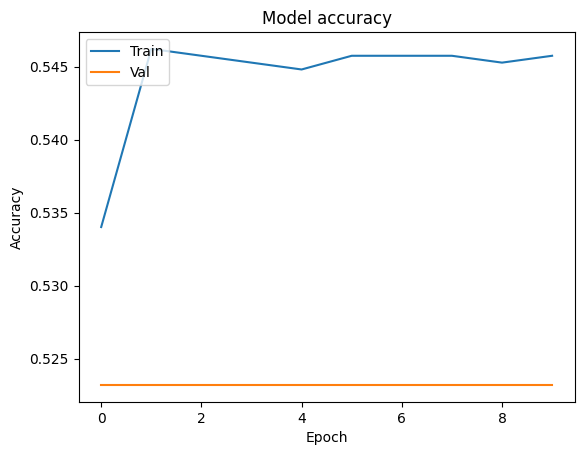

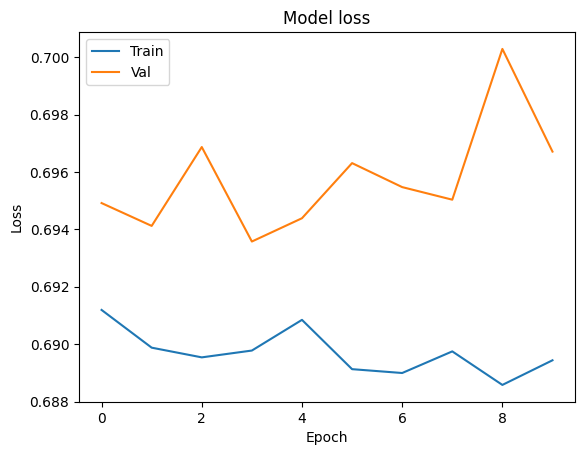

19/19 [==============================] - 0s 5ms/step - loss: 0.6835 - accuracy: 0.5784
Test Accuracy: 0.5784148573875427


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Assuming X and y are already defined
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM
time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)
y_seq = to_categorical(y_seq)

# Split data into training and test sets
X_train_seq, X_test_seq = X_seq[:int(len(X_seq)*0.8)], X_seq[int(len(X_seq)*0.8):]
y_train_seq, y_test_seq = y_seq[:int(len(y_seq)*0.8)], y_seq[int(len(y_seq)*0.8):]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X.shape[1])),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Evaluate model
test_loss, test_acc = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Accuracy: {test_acc}")
